In [163]:
import geopandas as gpd
from geopandas.tools import sjoin
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [71]:
os.chdir('D:\iMMAP\proj\ASDC\data\OCHA-Received\\')

In [154]:
afg = gpd.read_file(r"D:\iMMAP\data\Afghanistan\AFG_AdminBoundaries_AGCHO_20211117\Shapefiles\afg_admbnda_adm0_agcho_20211117.shp")

In [72]:
panda_df = pd.read_csv('airports.csv', delimiter=',', decimal='.')

In [96]:
points = gpd.GeoDataFrame(
    panda_df, geometry=gpd.points_from_xy(panda_df.longitude_deg, panda_df.latitude_deg))

In [127]:
points = points.set_crs('epsg:4326')
points.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [128]:
afg.to_crs('epsg:4326')
afg.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

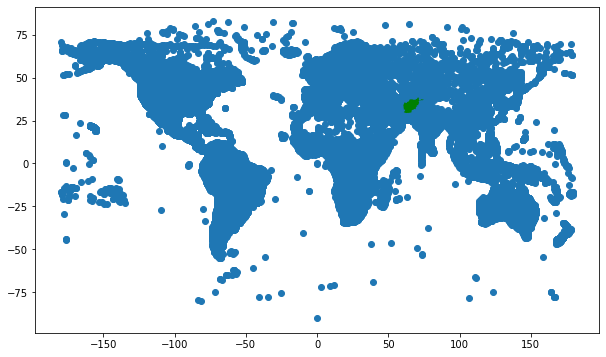

In [130]:
# View vector
fig, ax = plt.subplots(figsize=(14, 6))
points.plot(ax=ax)
afg.plot(ax=ax, color='green')
plt.show()

In [168]:
afg_buffer = afg.to_crs('EPSG:3857').buffer(10000).to_crs('EPSG:4326')

In [170]:
points_afg = gpd.clip(points, afg_buffer)

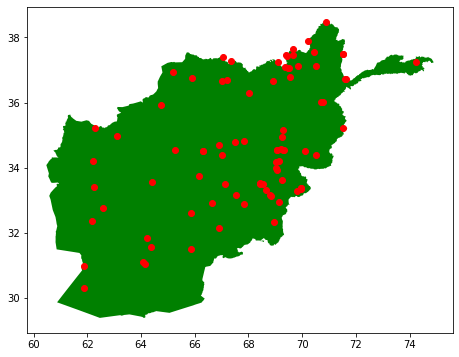

In [171]:
fig, ax = plt.subplots(figsize=(14, 6))
afg.plot(ax=ax, color='green')
points_afg.plot(ax=ax, color='red')
plt.show()

In [173]:
points_afg.to_file('ourairports_afg.shp')

C:\Users\VMO\AppData\Local\Temp\ipykernel_10896\755125054.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  points_afg.to_file('ourairports_afg.shp')
